![Airbnb image](the-airbnb-interview-a-look-into-their-hiring-process-rzQWz.jpeg)

Le projet a pour objectif d'appliquer des techniques avancées de traitement du langage naturel (NLP) sur un ensemble de données provenant de la plateforme Airbnb. Les données comprennent des commentaires d’utilisateurs provenant de plusieurs villes, rédigés dans différentes langues. L'objectif est d'utiliser des modèles NLP pour transformer ces données brutes en insights utiles, en se concentrant sur la détection de la langue, la traduction, l'analyse des sentiments et l'analyse thématique.

### I - Chargement et Prétraitement des Données
    ___ 1. Chargement des Données
    ___ 2. Nettoyage des Données et gestion des valeurs manquantes
    ___ 3. Nettoyage de Caractères Spéciaux

### II - Détection de Langue
    ___ 1. Documentation des Résultats

### III - Traduction des Commentaires Non Français
    ___ 1. Choix du Modèle de Traduction

### IV - Analyse de Sentiment
    ___ 1. Visualisation des Résultats
    ___ 2. Création de graphiques

### V - Analyse Thématique

## I -Chargement et Prétraitement des Données Chargement des Données

In [2]:
import pandas as pd
import re
import fasttext
from transformers import MarianMTModel, MarianTokenizer
from transformers import CamembertForSequenceClassification, CamembertTokenizer
import torch
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

### 1. Nous avons chargé plusieurs fichiers CSV contenant des commentaires d'Airbnb de plusieurs villes a savoir: Amsterdam, Antwerp, Asheville, Lyon.
##### Cette étape est cruciale pour rassembler toutes les données nécessaires à l'analyse.

In [2]:
df0 = pd.read_csv('reviews (1).csv.gz')
df1=pd.read_csv('reviews (2).csv.gz')
df2=pd.read_csv('reviews (3).csv.gz')
df3=pd.read_csv('reviews.csv.gz')

In [3]:
df0['ville']= 'Amsterdam'
df1['ville']= 'Antwerp'
df2['ville']='Asheville'
df3['ville']='lyon'

In [4]:
df= pd.concat([df0,df1,df2,df3], axis=0)
df

,listing_id,id,date,reviewer_id,reviewer_name,comments,ville
0,50904,31511792,2015-05-06,19482395,Jihae,Karin’s “Aplace” is absolutely beautiful and c...,Amsterdam
1,50904,470101024356869935,2021-10-10,333559,Emilie,"Karin is a wonderful host, she was really help...",Amsterdam
2,50904,627287279025726941,2022-05-15,32701854,Marie-Lou,The location is super super nice! Karin was al...,Amsterdam
3,224682,933043,2012-02-20,1422043,Hiske & Erik,"Perfect location for exploring the city, close...",Amsterdam
4,224682,970457,2012-03-05,1493171,Paolo,"Muriel was such a fantastic host, extremely he...",Amsterdam
...,...,...,...,...,...,...,...
440802,1220731757489855109,1225961080383327080,2024-08-18,280303344,Sam,Had a really nice stay in this apartment. It w...,lyon
440803,1221126358102458113,1232467925705111332,2024-08-27,173184452,Safha,"Firstly, I would like to mention that Sophie w...",lyon
440804,1221572481595092953,1231032436164053035,2024-08-25,135619385,Nicole,This stay did not disappoint! <br/>We couldn’t...,lyon
440805,1221580344177848903,1233987012912362887,2024-08-29,499339256,Gregory,Can’t say better things about this home and th...,lyon


### 2. Nettoyage des Données et gestion des valeurs manquantes
##### Nous avons identifié et supprimé les doublons pour garantir l'intégrité des données. La gestion des doublons est essentielle pour éviter des biais dans l'analyse. Par ailleurs les valeurs manquantes ont été supprimées pour éviter des erreurs lors des analyses ultérieures. Cela garantit que chaque commentaire est complet et utilisable.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1089901 entries, 0 to 440806
Data columns (total 7 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   listing_id     1089901 non-null  int64 
 1   id             1089901 non-null  int64 
 2   date           1089901 non-null  object
 3   reviewer_id    1089901 non-null  int64 
 4   reviewer_name  1089901 non-null  object
 5   comments       1089858 non-null  object
 6   ville          1089901 non-null  object
dtypes: int64(3), object(4)
memory usage: 66.5+ MB


In [6]:
doublons = df[df.duplicated()]
doublons.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     0 non-null      int64 
 1   id             0 non-null      int64 
 2   date           0 non-null      object
 3   reviewer_id    0 non-null      int64 
 4   reviewer_name  0 non-null      object
 5   comments       0 non-null      object
 6   ville          0 non-null      object
dtypes: int64(3), object(4)
memory usage: 0.0+ bytes


In [7]:
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1089901 entries, 0 to 440806
Data columns (total 7 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   listing_id     1089901 non-null  int64 
 1   id             1089901 non-null  int64 
 2   date           1089901 non-null  object
 3   reviewer_id    1089901 non-null  int64 
 4   reviewer_name  1089901 non-null  object
 5   comments       1089858 non-null  object
 6   ville          1089901 non-null  object
dtypes: int64(3), object(4)
memory usage: 66.5+ MB


In [8]:
print(len(df))
df= df.sample(frac=1).reset_index(drop=True)

1089901


In [9]:
len(df)

1089901

In [10]:
df.isnull().sum()

listing_id        0
id                0
date              0
reviewer_id       0
reviewer_name     0
comments         43
ville             0
dtype: int64

In [11]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1089858 entries, 0 to 1089900
Data columns (total 7 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   listing_id     1089858 non-null  int64 
 1   id             1089858 non-null  int64 
 2   date           1089858 non-null  object
 3   reviewer_id    1089858 non-null  int64 
 4   reviewer_name  1089858 non-null  object
 5   comments       1089858 non-null  object
 6   ville          1089858 non-null  object
dtypes: int64(3), object(4)
memory usage: 66.5+ MB


### 3. Nettoyage de Caractères Spéciaux
##### Nous avons nettoyé les commentaires en supprimant les caractères spéciaux. Cela améliore la qualité des données pour les étapes suivantes, notamment l'analyse de sentiments et l'extraction de thèmes.

In [12]:
def spec_cara(texte):
    return re.findall(r'[^\w\s]',texte)

In [13]:
df['comments_cleaned'] = df['comments'].str.replace(r'[^\w\s]', '', regex=True)
#df['comments']=df['comments'].str.replace(r'\s+','',regex=True).str.strip()

In [4]:
# Fonction pour faire le bash

def split_dataframe(df, batch_size):
    for i in range(0, len(df), batch_size):
        yield df.iloc[i:i+batch_size]

## II- Détection de Langue
##### Nous avons utilisé le modèle FastText pour détecter la langue de chaque commentaire. FastText est un modèle pré-entraîné qui offre une bonne précision pour la détection de langue, ce qui est essentiel pour le traitement ultérieur des commentaires.

In [15]:

model = fasttext.load_model('lid.176.ftz')
df['language']= df['comments'].apply(lambda x: model.predict(x)[0][0].replace('__label__', ''))

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1089858 entries, 0 to 1089900
Data columns (total 9 columns):
 #   Column            Non-Null Count    Dtype 
---  ------            --------------    ----- 
 0   listing_id        1089858 non-null  int64 
 1   id                1089858 non-null  int64 
 2   date              1089858 non-null  object
 3   reviewer_id       1089858 non-null  int64 
 4   reviewer_name     1089858 non-null  object
 5   comments          1089858 non-null  object
 6   ville             1089858 non-null  object
 7   comments_cleaned  1089858 non-null  object
 8   language          1089858 non-null  object
dtypes: int64(3), object(6)
memory usage: 83.1+ MB


In [17]:
df['language'].describe()

count     1089858
unique         97
top            en
freq       533989
Name: language, dtype: object

In [18]:
groupe=df.groupby('language')

In [19]:
# df.to_csv('df_clean_langue.csv')

In [20]:
groupe.head(100)

,listing_id,id,date,reviewer_id,reviewer_name,comments,ville,comments_cleaned,language
0,25975448,1216581138321804725,2024-08-05,529020837,Yvonna,Logement à proximité de la gare et de toute ac...,lyon,Logement à proximité de la gare et de toute ac...,fr
1,42635704,661336655996726080,2022-07-01,282941198,Yevhen,Thanks Najit for her hospitality. The apartme...,Antwerp,Thanks Najit for her hospitality The apartmen...,en
2,6133157,131993434,2017-02-15,5363303,Christopher,Cozy space. Nice if you plan to be out a lot s...,lyon,Cozy space Nice if you plan to be out a lot se...,en
3,43263535,919352061829564937,2023-06-22,52505016,Alexander,Simply perfect!,Amsterdam,Simply perfect,en
4,3944495,66958817,2016-03-25,59636395,Rahim,This place is beautiful and in a perfect locat...,lyon,This place is beautiful and in a perfect locat...,en
...,...,...,...,...,...,...,...,...,...
1081358,51204968,1129616765353679953,2024-04-07,537402142,Dominik,"Bilo je sve super, samo me smetalo da je bilo ...",Antwerp,Bilo je sve super samo me smetalo da je bilo d...,sr
1084397,2647365,1154208009426846047,2024-05-11,271231518,Phaëdra,Top plek,lyon,Top plek,af
1087283,655752776214577149,812845661567933099,2023-01-26,315180441,Patrick,"Super ludia!!! Slušnosť ochota ,privítanie vše...",Amsterdam,Super ludia Slušnosť ochota privítanie všetko ...,sk
1088476,35779920,855626824615974564,2023-03-26,23001972,Uthaiwan,ห้องพักและสิ่งอำนวยความสะดวกดีมาก ห้องกว้าง มี...,Antwerp,หองพกและสงอำนวยความสะดวกดมาก หองกวาง มพนทใชสอย...,th


### 1. Documentation des Résultats

In [21]:
stats = df.groupby('language').count()
stats

,listing_id,id,date,reviewer_id,reviewer_name,comments,ville,comments_cleaned
language,,,,,,,,
af,90,90,90,90,90,90,90,90
als,6,6,6,6,6,6,6,6
ar,196,196,196,196,196,196,196,196
arz,2,2,2,2,2,2,2,2
az,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...
war,15,15,15,15,15,15,15,15
wuu,23,23,23,23,23,23,23,23
yi,3,3,3,3,3,3,3,3


In [22]:
stats1 = stats.sort_values(by='comments', ascending=False)
stats1.head(50)

,listing_id,id,date,reviewer_id,reviewer_name,comments,ville,comments_cleaned
language,,,,,,,,
en,533989,533989,533989,533989,533989,533989,533989,533989
fr,347130,347130,347130,347130,347130,347130,347130,347130
nl,84986,84986,84986,84986,84986,84986,84986,84986
de,54983,54983,54983,54983,54983,54983,54983,54983
es,33183,33183,33183,33183,33183,33183,33183,33183
it,11539,11539,11539,11539,11539,11539,11539,11539
pt,6490,6490,6490,6490,6490,6490,6490,6490
zh,3155,3155,3155,3155,3155,3155,3155,3155
ru,2276,2276,2276,2276,2276,2276,2276,2276


## III- Traduction des Commentaires Non Français
### 1. Choix du Modèle de Traduction
##### Nous avons choisi d'utiliser le modèle MarianMT de Hugging Face pour traduire les commentaires non français en français. Ce modèle est reconnu pour sa qualité de traduction et sa capacité à gérer plusieurs langues. 
##### Remarque : De base nous étions partis sur le model T5, mais très vite on s’est heurté au problème de la multiplicité de langue. Cependant, le model T5 ne prenant pas beaucoup de langue en compte nous avons opté pour le model Helsinki avec ses différentes variantes qui prend en charge beaucoup plus de langues.
##### Nous avons automatisé le processus de traduction en traduisant chaque commentaire non français. Cela garantit que tous les commentaires sont disponibles dans une langue uniforme pour l'analyse.
##### Point important : Face au défi de trouver le model adéquat pour chaque langue, nous avons créé une fonction qui importe automatiquement le model adapté en fonction de la langue détecté.

In [23]:
models = {}
def get_translation_model(src_lang, tgt_lang="fr"):
    key = (src_lang, tgt_lang)

    if key in models:
        return models[key]
    
    if src_lang == 'fr':
        return None, None

    model_name = f"Helsinki-NLP/opus-mt-{src_lang}-{tgt_lang}"

    try:
        tokenizer = MarianTokenizer.from_pretrained(model_name)
        model = MarianMTModel.from_pretrained(model_name)
        models[key] = (tokenizer, model)
        return models[key]
    except Exception as e:
        print(f"Erreur lors du chargement du modèle {model_name}: {e}")
        return None, None



def traduction(text, src_lang, tgt_lang="fr"):
    # Vérification des textes vides ou invalides
    if not isinstance(text, str) or text.strip() == "" : 
        return ""
    
    
    if src_lang == 'fr':
        return text

    tokenizer, model = get_translation_model(src_lang, tgt_lang)
    
    # Si le modèle n'a pas pu être chargé, renvoyer le texte d'origine
    if model is None or tokenizer is None:
        
        return text

    try:
        inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True)
        traduit = model.generate(**inputs)
        return tokenizer.decode(traduit[0], skip_special_tokens=True)
    except Exception as e:
        print(f"Erreur lors de la traduction: {e}")
        return text

Nb: Pour mesurer la qualité du modele on utilise qualityestimation lorqu'on n'a pas le text source et bleu et rouge lorsqu'on a le texte source

In [24]:
t = "i have a cat at home whou likes appless..."
srl='en'
a = traduction(t,srl)
a

c:\Users\jorda\OneDrive\Desktop\MD4\environements\data_env\Lib\site-packages\transformers\models\marian\tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


"J'ai un chat à la maison qui aime les pommes..."

In [ ]:
size=100
bash_en_cour=[]

for df in split_dataframe(df, size):
    df['cmt_traduit']=df.apply(lambda row: traduction(row['comments_cleaned'], row['language'], tgt_lang="fr"), axis=1)
    
    bash_en_cour.append(df)
df= pd.concat(bash_en_cour, ignore_index=True)
df

In [ ]:
df.to_csv('df_traduit.csv')

## IV -Analyse de Sentiment
##### Nous avons choisi CamemBERT pour l'analyse de sentiments, car il est spécifiquement conçu pour le français et excelle dans les tâches de classification. Ce choix est justifié par la nécessité d'une précision élevée dans l'analyse des émotions exprimées dans les commentaires.

In [5]:
model_name = "cmarkea/distilcamembert-base-sentiment"
tokenizer = CamembertTokenizer.from_pretrained(model_name)
model = CamembertForSequenceClassification.from_pretrained(model_name)

def analyse_sentiment(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, max_length=512)
    with torch.no_grad():
        outputs = model(**inputs)
    scores = torch.nn.functional.softmax(outputs.logits, dim=1)
    return scores[0].tolist()



#### Nous avons appliqué le modèle CamemBERT pour classer chaque commentaire en tant que label "très négatif", "négatif", "neutre", "positif" ou "très positif" le tout via un vecteur de probabilite . Cette classification permet de quantifier les émotions des utilisateurs et d'identifier les tendances dans les commentaires.

In [6]:
df=pd.read_csv('df_traduit.csv')
size=100
bash_en_cour=[]
for df in split_dataframe(df, size):
    vecteur = df['cmt_traduit'].apply(analyse_sentiment)
    df[["Trè negatif","negatif", "neutre", "positif","Trè positif"]] = pd.DataFrame(vecteur.tolist(), index=df.index)
    bash_en_cour.append(df)
df= pd.concat(bash_en_cour, ignore_index=True)
df

C:\Users\jorda\AppData\Local\Temp\ipykernel_30860\272489716.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[["Trè negatif","negatif", "neutre", "positif","Trè positif"]] = pd.DataFrame(vecteur.tolist(), index=df.index)
C:\Users\jorda\AppData\Local\Temp\ipykernel_30860\272489716.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[["Trè negatif","negatif", "neutre", "positif","Trè positif"]] = pd.DataFrame(vecteur.tolist(), index=df.index)
C:\Users\jorda\AppData\Local\Temp\ipykernel_30860\272489716.

,Unnamed: 0,listing_id,id,date,reviewer_id,reviewer_name,comments,ville,comments_cleaned,language,cmt_traduit,Trè negatif,negatif,neutre,positif,Trè positif
0,0,805842550225732558,1192599868064766954,2024-07-03,578797324,Rahmi,"It is not clear from the photos, but the bedro...",Asheville,It is not clear from the photos but the bedroo...,en,Il n'est pas clair des photos mais la chambre ...,0.052968,0.368614,0.429754,0.120809,0.027855
1,1,24439562,317627773,2018-09-02,10775108,Gill,"Really nice apartment - clean, spacious, styli...",lyon,Really nice apartment clean spacious stylish ...,en,Vraiment agréable appartement propre spacieux ...,0.000861,0.001270,0.007258,0.160684,0.829928
2,2,16539738,627272215051641786,2022-05-15,289180638,Thorben,Alles bestens für ein JGA,lyon,Alles bestens für ein JGA,de,Tout va bien pour un JGA,0.004596,0.017213,0.114160,0.491125,0.372905
3,3,27777408,910755395584781376,2023-06-10,40021186,Sylwia,Thank you Leonardo for staying at your place ....,Amsterdam,Thank you Leonardo for staying at your place ...,en,Merci Leonardo d'être resté chez vous. Je me s...,0.006975,0.007760,0.023583,0.167033,0.794650
4,4,2248994,353465444,2018-11-28,11603685,GThomas,Mieux qu a l hotel!,Asheville,Mieux qu a l hotel,fr,Mieux qu a l hotel,0.014421,0.038947,0.167197,0.365255,0.414181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,13854126,181728850,2017-08-13,103850532,Max,Nice small appartement and a perfect location.,lyon,Nice small appartement and a perfect location,en,Joli petit appartement et un emplacement parfait,0.001518,0.005317,0.055553,0.441877,0.495736
96,96,4502646,403405800944678981,2021-07-10,118719660,Juan,Great location and cosy loft with an amazing v...,Amsterdam,Great location and cosy loft with an amazing view,en,Excellent emplacement et loft confortable avec...,0.001110,0.001701,0.010650,0.200683,0.785856
97,97,2819412,982443780510732063,2023-09-17,196879596,Hielke,she was very responsive and everything was ver...,Antwerp,she was very responsive and everything was ver...,en,elle était très sensible et tout était très cl...,0.003858,0.011315,0.063774,0.347311,0.573742
98,98,1164308493326441353,1241193750989955368,2024-09-08,125405809,Alice,"Vous pouvez y aller les yeux fermés, c’est vra...",Asheville,Vous pouvez y aller les yeux fermés cest vraim...,fr,Vous pouvez y aller les yeux fermés cest vraim...,0.000753,0.000890,0.005163,0.102870,0.890323


In [ ]:
# df = pd.DataFrame({"texte": ["J'adore ce produit!", "Ce service est terrible.", "Produit moyen, peut mieux faire."]})

# # Appliquer l'analyse de sentiment
# sentiments = df["texte"].apply(analyze_sentiment)
# sentiments
# df[["Trè negatif","negatif", "neutre", "positif","Trè positif"]] = pd.DataFrame(sentiments.tolist(), index=df.index)
# df

,texte,Trè negatif,negatif,neutre,positif,Trè positif
0,J'adore ce produit!,0.001599,0.001519,0.009731,0.184348,0.802804
1,Ce service est terrible.,0.257490,0.150247,0.133025,0.165328,0.293910
2,"Produit moyen, peut mieux faire.",0.020439,0.249827,0.686381,0.040762,0.002590


### 1. Visualisation des Résultats
#### Agrégation des Sentiments par Ville
##### Nous avons agrégé les résultats de l'analyse de sentiments par ville, ce qui permet de comparer les sentiments des utilisateurs selon leur localisation.

In [7]:
sentiments = [ 'negatif', 'neutre', 'positif']
grouped = df.groupby('ville')[sentiments].mean()

### 2. Création de Graphiques
##### Nous avons créé un graphique à barres pour visualiser la distribution des sentiments par ville. Cela permet d'identifier rapidement les villes où les utilisateurs sont les plus satisfaits ou insatisfaits.

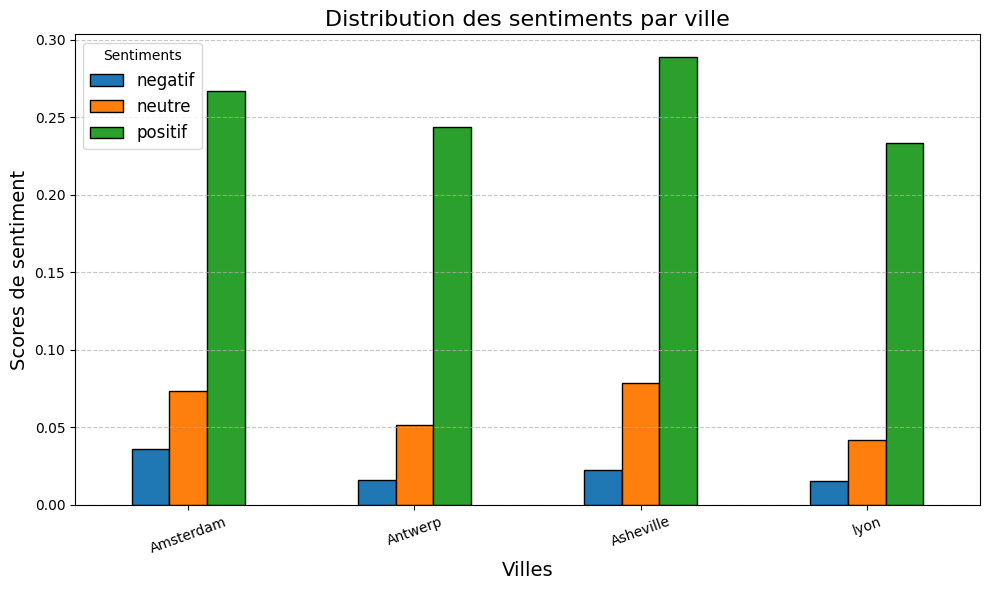

In [8]:
grouped.plot(kind='bar', figsize=(10, 6), alpha=1, edgecolor='black')

plt.title("Distribution des sentiments par ville", fontsize=16)
plt.xlabel("Villes", fontsize=14)
plt.ylabel("Scores de sentiment", fontsize=14)
plt.legend(title="Sentiments", fontsize=12)
plt.xticks(rotation=20)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [9]:
import spacy
nlp = spacy.load('fr_core_news_md')

## V. Analyse Thématique

In [10]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jorda\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [69]:
stop_words = set(stopwords.words('french'))
# mise a jour des stopwords
custom_stop_words = ['si', 'dont', 'plus','tout','toutes','très','toujours','donc','être','avoir','aussi','bon', 'bien', 'super']
stop_words.update(custom_stop_words)
stop_words_v0 = list(stop_words)
print(stop_words_v0)

['ayante', 'te', 'serai', 'des', 'serais', 'avions', 'notre', 'ce', 'serions', 'fut', 'auriez', 'la', 'toi', 'avez', 'as', 'tes', 'pour', 'soyez', 'que', 'plus', 'donc', 'soyons', 'super', 'je', 'ma', 'fus', 'une', 'lui', 'aies', 'eussions', 'aurons', 'sa', 'étée', 'n', 'aurions', 'fûtes', 'il', 'aviez', 'même', 'avaient', 'était', 'tout', 'son', 'aient', 'eût', 'eusse', 'avec', 'au', 'm', 'vous', 'vos', 'mes', 'dont', 'avait', 'suis', 'été', 'y', 'aurais', 'pas', 'ont', 'étées', 'mais', 'si', 'eues', 'eut', 'ait', 'ayant', 'étant', 'étantes', 'dans', 'qui', 'nos', 'tu', 'est', 'seras', 'étais', 'fûmes', 'eux', 'd', 'aussi', 'les', 'par', 's', 'avais', 'sur', 'aurai', 'c', 'l', 'ayez', 'très', 'soient', 'sera', 'eussiez', 'serez', 'ayons', 'es', 'ayantes', 'aurait', 'elle', 'leur', 'moi', 'se', 'ses', 'ton', 'sont', 'avoir', 'aie', 'eûtes', 'étante', 'auront', 'étés', 'du', 'qu', 'eûmes', 'bon', 'étants', 'j', 'fussions', 'soit', 'de', 'avons', 'serons', 'seront', 'aura', 'fût', 'fusse

In [57]:
print('être' in stop_words_v0)

True


In [58]:
def lemmatize_text(text):
    """
    Effectue la lemmatisation de chaque mot d'une phrase.
    
    Args:
        text (str): Phrase à traiter.
        
    Returns:
        str: Phrase avec les mots lemmatisés.
    """
    if isinstance(text, str):
        doc = nlp(text)
        lemmatized_words = [token.lemma_ for token in doc]
        return ' '.join(lemmatized_words)
    return text

In [59]:

df['cmt_lematisé'] = df['cmt_traduit'].apply(lemmatize_text)
df['cmt_lematisé'].head()
df

,listing_id,id,date,reviewer_id,reviewer_name,comments,ville,comments_cleaned,language,cmt_traduit,Trè negatif,negatif,neutre,positif,Trè positif,cmt_lematisé,niveau_satisfaction
0,805842550225732558,1192599868064766954,2024-07-03,578797324,Rahmi,"It is not clear from the photos, but the bedro...",Asheville,It is not clear from the photos but the bedroo...,en,Il n'est pas clair des photos mais la chambre ...,0.052968,0.368614,0.429754,0.120809,0.027855,il ne être pas clair un photo mais le chambre ...,neutre
1,24439562,317627773,2018-09-02,10775108,Gill,"Really nice apartment - clean, spacious, styli...",lyon,Really nice apartment clean spacious stylish ...,en,Vraiment agréable appartement propre spacieux ...,0.000861,0.001270,0.007258,0.160684,0.829928,vraiment agréable appartement propre spacieux ...,Trè positif
2,16539738,627272215051641786,2022-05-15,289180638,Thorben,Alles bestens für ein JGA,lyon,Alles bestens für ein JGA,de,Tout va bien pour un JGA,0.004596,0.017213,0.114160,0.491125,0.372905,tout aller bien pour un JGA,positif
3,27777408,910755395584781376,2023-06-10,40021186,Sylwia,Thank you Leonardo for staying at your place ....,Amsterdam,Thank you Leonardo for staying at your place ...,en,Merci Leonardo d'être resté chez vous. Je me s...,0.006975,0.007760,0.023583,0.167033,0.794650,merci Leonardo de être rester chez vous . je m...,Trè positif
4,2248994,353465444,2018-11-28,11603685,GThomas,Mieux qu a l hotel!,Asheville,Mieux qu a l hotel,fr,Mieux qu a l hotel,0.014421,0.038947,0.167197,0.365255,0.414181,mieux que avoir l hotel,Trè positif
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,13854126,181728850,2017-08-13,103850532,Max,Nice small appartement and a perfect location.,lyon,Nice small appartement and a perfect location,en,Joli petit appartement et un emplacement parfait,0.001518,0.005317,0.055553,0.441877,0.495736,joli petit appartement et un emplacement parfait,Trè positif
96,4502646,403405800944678981,2021-07-10,118719660,Juan,Great location and cosy loft with an amazing v...,Amsterdam,Great location and cosy loft with an amazing view,en,Excellent emplacement et loft confortable avec...,0.001110,0.001701,0.010650,0.200683,0.785856,excellent emplacement et loft confortable avec...,Trè positif
97,2819412,982443780510732063,2023-09-17,196879596,Hielke,she was very responsive and everything was ver...,Antwerp,she was very responsive and everything was ver...,en,elle était très sensible et tout était très cl...,0.003858,0.011315,0.063774,0.347311,0.573742,lui être très sensible et tout être très clair...,Trè positif
98,1164308493326441353,1241193750989955368,2024-09-08,125405809,Alice,"Vous pouvez y aller les yeux fermés, c’est vra...",Asheville,Vous pouvez y aller les yeux fermés cest vraim...,fr,Vous pouvez y aller les yeux fermés cest vraim...,0.000753,0.000890,0.005163,0.102870,0.890323,vous pouvoir y aller le oeil fermer cest vraim...,Trè positif


In [54]:
# df = df.drop('Unnamed: 0', axis=1)
df['niveau_satisfaction'] = df[['Trè negatif',	"negatif"	,'neutre',	'positif'	,'Trè positif']].apply(lambda row: row.idxmax(), axis=1)
df

,listing_id,id,date,reviewer_id,reviewer_name,comments,ville,comments_cleaned,language,cmt_traduit,Trè negatif,negatif,neutre,positif,Trè positif,cmt_lematisé,niveau_satisfaction
0,805842550225732558,1192599868064766954,2024-07-03,578797324,Rahmi,"It is not clear from the photos, but the bedro...",Asheville,It is not clear from the photos but the bedroo...,en,Il n'est pas clair des photos mais la chambre ...,0.052968,0.368614,0.429754,0.120809,0.027855,il ne être pas clair un photo mais le chambre ...,neutre
1,24439562,317627773,2018-09-02,10775108,Gill,"Really nice apartment - clean, spacious, styli...",lyon,Really nice apartment clean spacious stylish ...,en,Vraiment agréable appartement propre spacieux ...,0.000861,0.001270,0.007258,0.160684,0.829928,vraiment agréable appartement propre spacieux ...,Trè positif
2,16539738,627272215051641786,2022-05-15,289180638,Thorben,Alles bestens für ein JGA,lyon,Alles bestens für ein JGA,de,Tout va bien pour un JGA,0.004596,0.017213,0.114160,0.491125,0.372905,tout aller bien pour un JGA,positif
3,27777408,910755395584781376,2023-06-10,40021186,Sylwia,Thank you Leonardo for staying at your place ....,Amsterdam,Thank you Leonardo for staying at your place ...,en,Merci Leonardo d'être resté chez vous. Je me s...,0.006975,0.007760,0.023583,0.167033,0.794650,merci Leonardo de être rester chez vous . je m...,Trè positif
4,2248994,353465444,2018-11-28,11603685,GThomas,Mieux qu a l hotel!,Asheville,Mieux qu a l hotel,fr,Mieux qu a l hotel,0.014421,0.038947,0.167197,0.365255,0.414181,mieux que avoir l hotel,Trè positif
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,13854126,181728850,2017-08-13,103850532,Max,Nice small appartement and a perfect location.,lyon,Nice small appartement and a perfect location,en,Joli petit appartement et un emplacement parfait,0.001518,0.005317,0.055553,0.441877,0.495736,joli petit appartement et un emplacement parfait,Trè positif
96,4502646,403405800944678981,2021-07-10,118719660,Juan,Great location and cosy loft with an amazing v...,Amsterdam,Great location and cosy loft with an amazing view,en,Excellent emplacement et loft confortable avec...,0.001110,0.001701,0.010650,0.200683,0.785856,excellent emplacement et loft confortable avec...,Trè positif
97,2819412,982443780510732063,2023-09-17,196879596,Hielke,she was very responsive and everything was ver...,Antwerp,she was very responsive and everything was ver...,en,elle était très sensible et tout était très cl...,0.003858,0.011315,0.063774,0.347311,0.573742,lui être très sensible et tout être très clair...,Trè positif
98,1164308493326441353,1241193750989955368,2024-09-08,125405809,Alice,"Vous pouvez y aller les yeux fermés, c’est vra...",Asheville,Vous pouvez y aller les yeux fermés cest vraim...,fr,Vous pouvez y aller les yeux fermés cest vraim...,0.000753,0.000890,0.005163,0.102870,0.890323,vous pouvoir y aller le oeil fermer cest vraim...,Trè positif


In [70]:
stop_word = stop_words_v0
# Exemple : vos commentaires
corpus = df['cmt_lematisé']

# TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=50, stop_words=stop_word)  # Ajustez max_features selon vos besoins
X = vectorizer.fit_transform(corpus)

# Extraction des mots-clés
tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
tfidf_df['ville'] = df['ville']  # Ajout de la ville pour regrouper plus tard

# Moyenne des scores TF-IDF par ville
keywords_by_city = tfidf_df.groupby('ville').mean()

keywords_by_city

,accueillir,agréable,aider,aller,amsterdam,appartement,bain,beaucoup,bel,bordeaux,...,recommander,rester,revenir,sentir,situer,spacieux,studio,séjour,vivement,vraiment
ville,,,,,,,,,,,,,,,,,,,,,
Amsterdam,0.000000,0.053461,0.000000,0.000000,0.000000,0.044737,0.000000,0.060386,0.000000,0.000000,...,0.000000,0.047027,0.000000,0.050485,0.000000,0.000000,0.000000,0.045613,0.000000,0.000000
Antwerp,0.000000,0.093489,0.000000,0.028062,0.000000,0.129994,0.000000,0.020217,0.026140,0.000000,...,0.184175,0.000000,0.026140,0.045752,0.000000,0.026072,0.040925,0.076823,0.021862,0.022861
Asheville,0.038717,0.048407,0.011605,0.020773,0.000000,0.058133,0.015607,0.026891,0.019838,0.074868,...,0.104815,0.029078,0.039333,0.018811,0.025194,0.034033,0.000000,0.071711,0.036767,0.051878
lyon,0.051668,0.020397,0.055155,0.048976,0.113654,0.074791,0.029370,0.039776,0.058477,0.000000,...,0.087102,0.032638,0.034427,0.009745,0.052646,0.019913,0.039742,0.051043,0.000000,0.038837


In [29]:
from wordcloud import WordCloud
import ipywidgets as widgets

Dropdown(description='Ville:', options=('Asheville', 'lyon', 'Amsterdam', 'Antwerp'), value='Asheville')

Ville sélectionnée: lyon


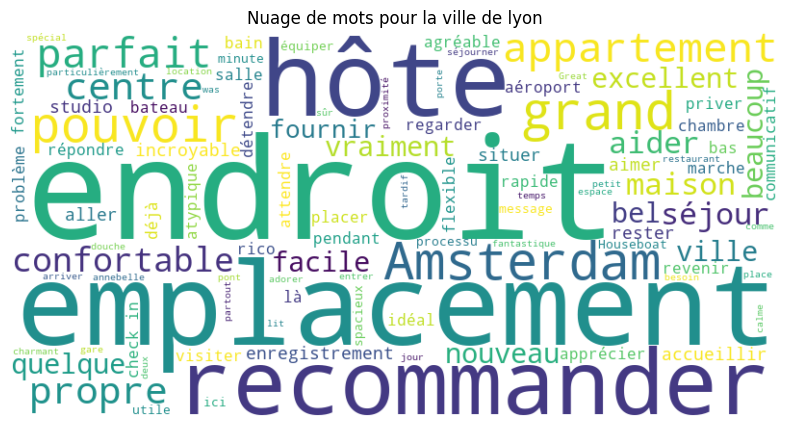

In [71]:
def on_value_change(change):
    ville_cible = change['new']
    print(f"Ville sélectionnée: {ville_cible}")
    
    # Filtrer les commentaires pour la ville donnée
    corpus_ville = df[df['ville'] == ville_cible]['cmt_lematisé']
    
    # Joindre tous les commentaires en un seul texte
    text_ville = ' '.join(corpus_ville)
    
    # Générer le nuage de mots
    wordcloud = WordCloud(
        stopwords=stop_words_v0,  # Utiliser les stopwords update
        background_color='white',
        width=800, height=400, 
        max_words=100  # Limiter à 100 mots
    ).generate(text_ville)
    
    # Afficher le nuage de mots
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  # Désactive les axes
    plt.title(f"Nuage de mots pour la ville de {ville_cible}")
    plt.show()

ville_dropdown = widgets.Dropdown(
    options=df['ville'].unique(),
    description='Ville:',
    disabled=False
)
# Afficher la liste déroulante
display(ville_dropdown)

# Lier l'événement de changement de valeur à la fonction
ville_dropdown.observe(on_value_change, names='value')